In [1]:
import sys
import os
import logging
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import jax

os.environ['CUDA_VISIBLE_DEVICES'] = '3'
jax.config.update('jax_enable_x64', True)

sys.path.append('/home/iiyama/src/qite')
from qite.qite import qite
from qite.z2lgt_1d import hamiltonian, domain_of

logging.basicConfig(level=logging.WARNING)
logging.getLogger('qite.qite').setLevel(logging.INFO)

In [2]:
ham = hamiltonian(num_sites=6, mass=0.5, coupling=1.2)

# Exactly diagonalize and set the initial state as (|0> + |1>) / sqrt(2)
evals, evecs = eigsh(ham.to_matrix(sparse=True), k=2, which='SA')
initial_state = (evecs[:, 0] + evecs[:, 1]) * np.sqrt(0.5)

domains = [domain_of(hterm, {1: 5, 3: 5}) for hterm in ham]
state, energies = qite(ham, domains, initial_state, delta_beta=0.1,
                       num_steps=20, solver_params={'solver': 'minres', 'rtol': 1.e-8})

INFO:qite.qite:QITE step 0
INFO:qite.qite:QITE step 1
INFO:qite.qite:QITE step 2
INFO:qite.qite:QITE step 3
INFO:qite.qite:QITE step 4
INFO:qite.qite:QITE step 5
INFO:qite.qite:QITE step 6
INFO:qite.qite:QITE step 7
INFO:qite.qite:QITE step 8
INFO:qite.qite:QITE step 9
INFO:qite.qite:QITE step 10
INFO:qite.qite:QITE step 11
INFO:qite.qite:QITE step 12
INFO:qite.qite:QITE step 13
INFO:qite.qite:QITE step 14
INFO:qite.qite:QITE step 15
INFO:qite.qite:QITE step 16
INFO:qite.qite:QITE step 17
INFO:qite.qite:QITE step 18
INFO:qite.qite:QITE step 19


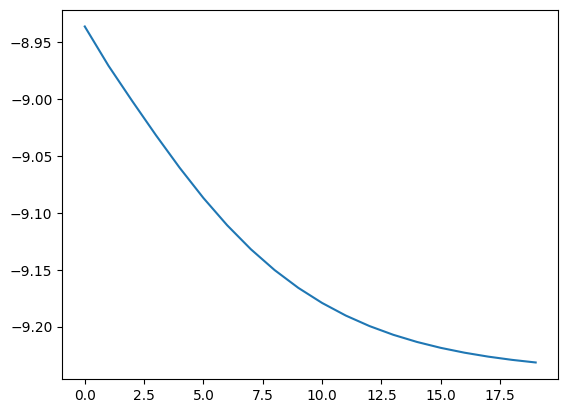

In [3]:
plt.plot(energies)